In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from typing import Union, Optional, List, Dict, Tuple, Any

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score

In [2]:
mushrooms = pd.read_csv('../datasets/poisonous_mushrooms/train.csv').dropna(how='all')
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [3]:
mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [4]:
mushrooms_test = pd.read_csv('../datasets/poisonous_mushrooms/test.csv').dropna(how='all')

In [138]:
mushrooms_test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [5]:
mushrooms_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 1.5 GB


In [6]:
nan_rows_train = mushrooms.isna().sum(axis=1).value_counts()
for i in range(1, mushrooms.shape[1]):
    count = nan_rows_train.get(i, 0)
    print(f"{i:<2} : {count:,}")

1  : 53
2  : 43,419
3  : 153,087
4  : 615,895
5  : 1,253,551
6  : 786,657
7  : 243,195
8  : 21,078
9  : 10
10 : 0
11 : 0
12 : 0
13 : 0
14 : 0
15 : 0
16 : 0
17 : 0
18 : 0
19 : 0
20 : 0
21 : 0


In [7]:
nan_rows_test = mushrooms_test.isna().sum(axis=1).value_counts()
for i in range(1, mushrooms.shape[1]):
    count = nan_rows_test.get(i, 0)
    print(f"{i:<2} : {count:,}")

1  : 37
2  : 29,107
3  : 101,497
4  : 411,043
5  : 835,170
6  : 525,024
7  : 162,121
8  : 13,963
9  : 2
10 : 0
11 : 0
12 : 0
13 : 0
14 : 0
15 : 0
16 : 0
17 : 0
18 : 0
19 : 0
20 : 0
21 : 0


In [8]:
print("Cap diameter", mushrooms['cap-diameter'].min(), " - ", mushrooms['cap-diameter'].max())

Cap diameter 0.03  -  80.67


<Axes: >

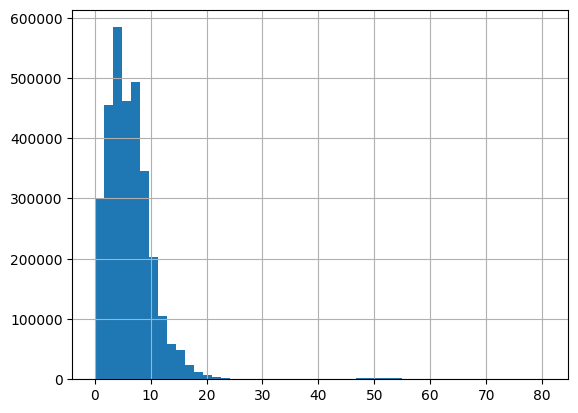

In [9]:
mushrooms['cap-diameter'].hist(bins=50)

In [10]:
mushrooms['cap-shape'].value_counts().head(15)

cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
w         36
t         36
g         34
y         33
r         32
Name: count, dtype: int64

In [11]:
mushrooms['cap-surface'].value_counts().head(15)

cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
l     44859
n        96
f        75
p        59
u        49
Name: count, dtype: int64

In [12]:
mushrooms['cap-color'].value_counts().head(15)

cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
k      59888
l      39558
f         53
d         48
s         39
Name: count, dtype: int64

In [13]:
mushrooms['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
b                 7
y                 7
a                 7
x                 7
s                 6
k                 6
d                 4
e                 4
p                 4
l                 4
z                 3
o                 3
g                 3
n                 2
i                 2
has-ring          1
r                 1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [14]:
mushrooms['gill-attachment'].value_counts().head(15)

gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
c        74
u        56
w        37
t        36
k        33
y        28
i        25
m        22
Name: count, dtype: int64

In [15]:
mushrooms['gill-spacing'].value_counts().head(15)

gill-spacing
c    1331054
d     407932
f     119380
e         24
a         17
s         16
b         12
x          8
t          8
p          7
g          4
k          4
h          3
l          3
y          2
Name: count, dtype: int64

In [16]:
mushrooms['gill-color'].value_counts().head(15)

gill-color
w    931538
n    543386
y    469464
p    343626
g    212164
o    157119
k    127970
f    119694
r     62799
e     56047
b     47247
u     45399
l        55
t        54
d        54
Name: count, dtype: int64

In [17]:
print("Stem height ", mushrooms['stem-height'].min(), " - ", mushrooms['stem-height'].max())

Stem height  0.0  -  88.72


<Axes: >

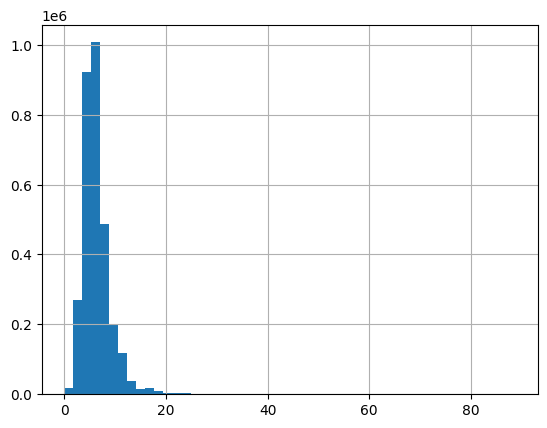

In [18]:
mushrooms['stem-height'].hist(bins=50)

In [19]:
print("Stem width ", mushrooms['stem-width'].min(), " - ", mushrooms['stem-width'].max())

Stem width  0.0  -  102.9


<Axes: >

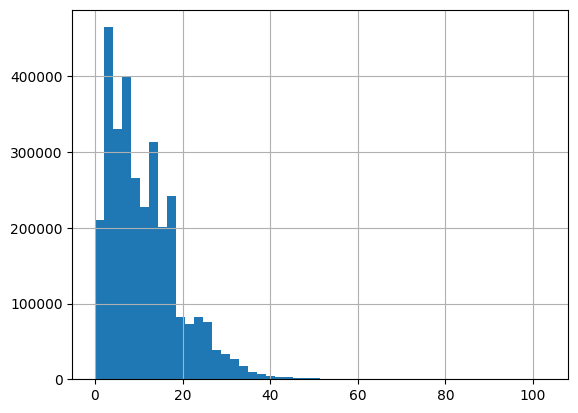

In [20]:
mushrooms['stem-width'].hist(bins=50)

In [21]:
mushrooms['stem-color'].value_counts().head(15)

stem-color
w    1196637
n    1003464
y     373971
g     132019
o     111541
e     103373
u      67017
p      54690
k      33676
r      22329
l       9994
b       7365
f        573
s         51
t         40
Name: count, dtype: int64

In [22]:
mushrooms['stem-color'].value_counts(normalize=True).head(15)

stem-color
w    0.383918
n    0.321942
y    0.119981
g    0.042356
o    0.035786
e    0.033165
u    0.021501
p    0.017546
k    0.010804
r    0.007164
l    0.003206
b    0.002363
f    0.000184
s    0.000016
t    0.000013
Name: proportion, dtype: float64

In [23]:
mushrooms['has-ring'].value_counts()

has-ring
f             2368820
t              747982
r                  16
h                  13
c                  11
s                  11
l                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
o                   2
k                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [24]:
mushrooms['ring-type'].value_counts()

ring-type
f                       2477170
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
4                             1
15                            1
3.12                          1
does-bruise-or-bleed          1
11                            

In [25]:
mushrooms['habitat'].value_counts().head(15)

habitat
d    2177573
g     454908
l     171892
m     150969
h     120137
w      18530
p      17180
u       5264
e         55
s         52
n         41
t         40
r         38
y         34
a         34
Name: count, dtype: int64

In [26]:
mushrooms['season'].value_counts()

season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

In [27]:
def clear(
    data: pd.DataFrame,
    id_col : str = 'id', 
    row_nan_threshold: Optional[int] = None,
    column_nan_threshold: Optional[float] = 0.5,
    binary_columns: Optional[Dict[str, list]] = None,
    has_ring_col: str = 'has-ring',
    ringtype_col: str = 'ring-type',
    reset_index: bool = True
) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    df = data.copy()
    info: Dict[str, Any] = dict()

    info['id_col'] = id_col
    info['row_nan_threshold'] = row_nan_threshold
    info['column_nan_threshold'] = column_nan_threshold
    info['has_ring_col'] = has_ring_col
    info['ringtype_col'] = ringtype_col
    
    if id_col in data.columns:
        data.drop('id', axis=1, inplace=True)
    
    nan_frac = df.isna().mean()
    drop_cols = nan_frac[nan_frac > column_nan_threshold].index.tolist()
    df.drop(columns=drop_cols, inplace=True)
    info['dropped_cols_nan_above_threshold'] = drop_cols

    na_counts = df.isna().sum(axis=1)
    na_histogram = na_counts.value_counts().sort_index()
    info['row_nan_hist'] = na_histogram.to_dict()

    if row_nan_threshold is not None:
        initial_rows = df.shape[0]
        df = df[na_counts <= row_nan_threshold].copy()
        info['removed_rows_by_nan'] = initial_rows - df.shape[0]
    else:
        info['removed_rows_by_nan'] = 0

    default_binary = {
        'does-bruise-or-bleed': ['f', 't'],
        'has-ring': ['f', 't'],
    }
    if binary_columns is not None:
        default_binary.update(binary_columns)
    for col, allowed in default_binary.items():
        if col in df.columns:
            invalid_idx = df[~df[col].isin(allowed)].index
            count = len(invalid_idx)
            if count > 0:
                df.drop(index=invalid_idx, inplace=True)
            info[f'removed_invalid_{col}_rows'] = count

    info['binary_columns'] = default_binary

    if has_ring_col in df.columns and ringtype_col in df.columns:
        inconsistent_f = df[(df[has_ring_col] == 'f') & (df[ringtype_col] != 'f')]
        inconsistent_t = df[(df[has_ring_col] == 't') & (df[ringtype_col] == 'f')]
        inconsistent = pd.concat([inconsistent_f, inconsistent_t])
        info['has_ring_ringtype_inconsistent_count'] = inconsistent.shape[0]
        info['has_ring_ringtype_inconsistent_indices'] = inconsistent.index.tolist()
        if not inconsistent.empty:
            df.drop(inconsistent.index, inplace=True)
    else:
        info['has_ring_ringtype_inconsistent_count'] = None
        info['has_ring_ringtype_inconsistent_indices'] = None

    if reset_index:
        df.reset_index(drop=True, inplace=True)

    info['reset_index'] = reset_index
    
    return df, info

In [30]:
mushrooms_clean, clear_info = clear(mushrooms, row_nan_threshold=2)

In [31]:
mushrooms_clean

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928776,p,9.30,o,NaN,e,f,f,f,f,3.42,25.38,n,f,f,d,u
2928777,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,w,f,f,d,u
2928778,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,y,t,z,d,a
2928779,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,w,t,p,d,u


In [32]:
nan_rows_train = mushrooms_clean.isna().sum(axis=1).value_counts()
for i in range(1, mushrooms.shape[1]):
    count = nan_rows_train.get(i, 0)
    print(f"{i:<2} : {count:,}")

1  : 1,321,265
2  : 455,924
3  : 0
4  : 0
5  : 0
6  : 0
7  : 0
8  : 0
9  : 0
10 : 0
11 : 0
12 : 0
13 : 0
14 : 0
15 : 0
16 : 0
17 : 0
18 : 0
19 : 0
20 : 0


In [33]:
mushrooms_clean.isna().sum()

class                         0
cap-diameter                  3
cap-shape                    18
cap-surface              574117
cap-color                     9
does-bruise-or-bleed          0
gill-attachment          410141
gill-spacing            1137303
gill-color                   38
stem-height                   0
stem-width                    0
stem-color                   26
has-ring                      0
ring-type                111426
habitat                      32
season                        0
dtype: int64

In [34]:
print("Cap diameter", mushrooms_clean['cap-diameter'].min(), " - ", mushrooms_clean['cap-diameter'].max())

Cap diameter 0.03  -  80.67


<Axes: >

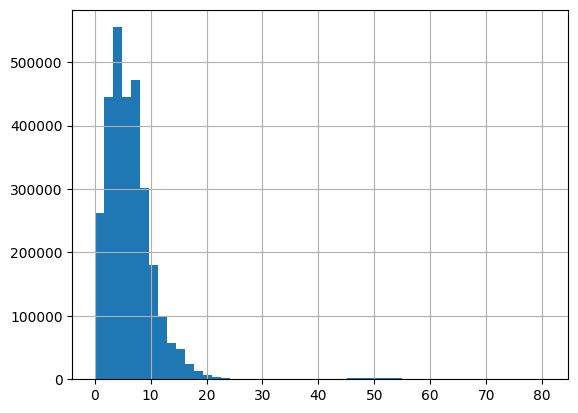

In [35]:
mushrooms_clean['cap-diameter'].hist(bins=50)

In [36]:
mushrooms_clean['cap-shape'].value_counts().head(15)

cap-shape
x    1398883
f     641737
s     308775
b     282472
p     106349
c     104364
o      85694
d         59
e         55
n         40
w         35
g         32
t         31
y         31
r         30
Name: count, dtype: int64

In [37]:
mushrooms_clean['cap-surface'].value_counts().head(15)

cap-surface
t    414929
s    384102
y    326574
h    275765
g    263604
d    206510
i    113210
k    110720
w    109795
e    104045
l     44829
n        94
f        71
p        54
u        47
Name: count, dtype: int64

In [38]:
mushrooms_clean['cap-color'].value_counts().head(15)

cap-color
n    1259707
w     366099
y     362204
g     210104
e     196746
o     170076
p      74654
u      73088
r      70488
k      59782
b      45996
l      39492
f         47
d         46
s         39
Name: count, dtype: int64

In [39]:
mushrooms_clean['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f    2439101
t     489680
Name: count, dtype: int64

In [40]:
mushrooms_clean['gill-attachment'].value_counts().head(15)

gill-attachment
a    644851
d    548784
x    360474
e    300987
s    295082
p    260761
f    107229
c        71
u        54
w        37
t        35
k        28
y        27
i        25
m        21
Name: count, dtype: int64

In [41]:
mushrooms_clean['gill-spacing'].value_counts().head(15)

gill-spacing
c    1276951
d     407626
f     106760
e         24
a         17
s         16
b         10
x          8
t          8
p          7
k          4
g          4
l          3
h          3
y          2
Name: count, dtype: int64

In [42]:
mushrooms_clean['gill-color'].value_counts().head(15)

gill-color
w    891500
n    504459
y    468401
p    325889
g    202733
o    134696
f    107061
k     97720
r     62706
e     55953
u     45304
b     31903
l        53
d        52
t        46
Name: count, dtype: int64

In [43]:
print("Stem height ", mushrooms_clean['stem-height'].min(), " - ", mushrooms_clean['stem-height'].max())

Stem height  0.0  -  88.72


<Axes: >

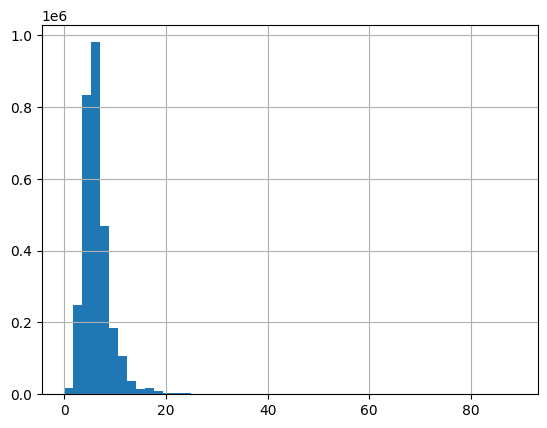

In [44]:
mushrooms_clean['stem-height'].hist(bins=50)

In [45]:
print("Stem width ", mushrooms_clean['stem-width'].min(), " - ", mushrooms_clean['stem-width'].max())

Stem width  0.0  -  102.9


<Axes: >

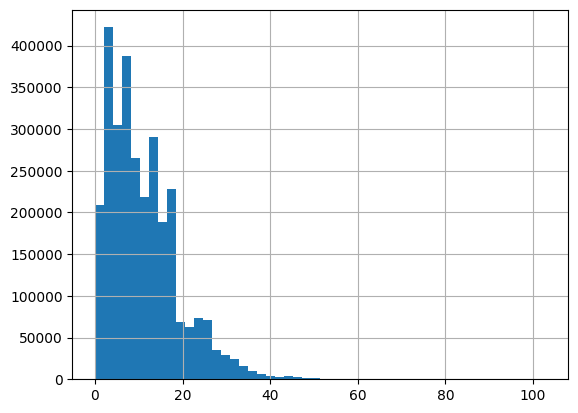

In [46]:
mushrooms_clean['stem-width'].hist(bins=50)

In [47]:
mushrooms_clean['stem-color'].value_counts().head(15)

stem-color
w    1108743
n     922425
y     372622
g     131827
o     111336
e     103213
u      66966
p      37761
k      33607
r      22273
l       9957
b       7358
f        413
s         49
t         39
Name: count, dtype: int64

In [48]:
mushrooms_clean['stem-color'].value_counts(normalize=True).head(15)

stem-color
w    0.378571
n    0.314955
y    0.127229
g    0.045011
o    0.038015
e    0.035241
u    0.022865
p    0.012893
k    0.011475
r    0.007605
l    0.003400
b    0.002512
f    0.000141
s    0.000017
t    0.000013
Name: proportion, dtype: float64

In [49]:
mushrooms_clean['habitat'].value_counts().head(15)

habitat
d    2054971
g     406380
l     171801
m     140728
h     119971
w      18448
p      10773
u       5253
e         53
s         49
n         40
r         38
t         36
y         33
a         32
Name: count, dtype: int64

In [50]:
mushrooms_clean['season'].value_counts()

season
a    1455171
u    1061849
w     272178
s     139583
Name: count, dtype: int64

In [51]:
mushrooms_clean['has-ring'].value_counts()

has-ring
f    2324841
t     603940
Name: count, dtype: int64

In [52]:
mushrooms_clean['ring-type'].value_counts()

ring-type
f            2324841
e             119639
z             113693
l              73366
r              67807
p              67611
g              46124
m               3974
t                 76
n                 31
y                 24
d                 21
b                 19
k                 18
x                 16
h                 15
w                 13
u                 13
s                 12
o                  8
c                  8
a                  7
ring-type          5
i                  4
season             2
3.12               1
15                 1
4                  1
11                 1
does f             1
14                 1
class              1
sp                 1
Name: count, dtype: int64

In [53]:
f_in_has_ring = (mushrooms_clean['has-ring'] == 'f').sum()
f_in_ring_type = (mushrooms_clean['ring-type'] == 'f').sum()
print(f'has-ring == "f":    {f_in_has_ring}')
print(f'ring-type == "f":   {f_in_ring_type}')
print("Match?", f_in_has_ring == f_in_ring_type)

t_in_has_ring = (mushrooms_clean['has-ring'] == 't').sum()
not_f_in_ring_type = (mushrooms_clean['ring-type'] != 'f').sum()
print(f'has-ring == "t":          {t_in_has_ring}')
print(f'ring-type != "f":         {not_f_in_ring_type}')
print("Match?", t_in_has_ring == not_f_in_ring_type)

matching_f = (
    mushrooms_clean.loc[mushrooms_clean['has-ring'] == 'f', 'ring-type'] == 'f'
).all()
matching_t = (
    mushrooms_clean.loc[mushrooms_clean['has-ring'] == 't', 'ring-type'] != 'f'
).all()
print(f'All has-ring == "f" and ring-type == "f": {matching_f}')
print(f'All has-ring == "t" and ring-type != "f": {matching_t}')

has-ring == "f":    2324841
ring-type == "f":   2324841
Match? True
has-ring == "t":          603940
ring-type != "f":         603940
Match? True
All has-ring == "f" and ring-type == "f": True
All has-ring == "t" and ring-type != "f": True


In [54]:
def find_majority_classes(
    data: pd.DataFrame,
    columns: List[str],
    threshold: float = 0.99
) -> Dict[str, List[str]]:
    
    result = {}
    for col in columns:
        if col not in data.columns:
            continue
        vc = data[col].value_counts(normalize=True)
        cumsum = vc.cumsum()
        allowed = cumsum[cumsum <= threshold].index.tolist()
        if len(allowed) < len(vc):
            allowed.append(cumsum.index[len(allowed)])
        result[col] = allowed
    return result

In [55]:
majority_classes = find_majority_classes(
    mushrooms_clean,
    [
        'cap-shape', 'cap-surface', 'cap-color', 
        'gill-attachment', 'gill-spacing', 'gill-color', 
        'stem-color', 'ring-type', 'habitat'
    ],
    threshold=0.95
)
for col, classes in majority_classes.items():
    print(f"{col}: {classes}")

cap-shape: ['x', 'f', 's', 'b', 'p', 'c']
cap-surface: ['t', 's', 'y', 'h', 'g', 'd', 'i', 'k', 'w', 'e']
cap-color: ['n', 'w', 'y', 'g', 'e', 'o', 'p', 'u', 'r']
gill-attachment: ['a', 'd', 'x', 'e', 's', 'p']
gill-spacing: ['c', 'd', 'f']
gill-color: ['w', 'n', 'y', 'p', 'g', 'o', 'f', 'k', 'r']
stem-color: ['w', 'n', 'y', 'g', 'o', 'e', 'u']
ring-type: ['f', 'e', 'z', 'l', 'r']
habitat: ['d', 'g', 'l', 'm', 'h']


In [56]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [57]:
def preprocess(
    data: pd.DataFrame,
    majority_classes: Dict[str, list],
    scale_numeric: bool = True
) -> Tuple[pd.DataFrame, Dict[str, Any]]:

    data = data.copy()
    info: Dict[str, Any] = {}


    info['majority_classes'] = majority_classes
    info['scale_numeric'] = scale_numeric
    
    data['class'] = (data['class'] == 'p').astype('int8')
    info['class_values'] = dict(p=1, e=0)

    data['does-bruise-or-bleed'] = (data['does-bruise-or-bleed'] == 't').astype('int8')
    info['does-bruise-or-bleed_values'] = dict(t=1, f=0)

    data['has-ring'] = (data['has-ring'] == 't').astype('int8')
    info['has-ring_values'] = dict(t=1, f=0)

    num_cols = ['cap-diameter', 'stem-height', 'stem-width']
    info['numeric_cols'] = num_cols
    if scale_numeric:
        scaler = StandardScaler()
        data[num_cols] = scaler.fit_transform(data[num_cols])
        info['scaler'] = scaler
    for col in num_cols:
        data[col] = data[col].astype('float32')

    cat_cols = [
        'cap-shape','cap-surface','cap-color',
        'gill-attachment','gill-spacing','gill-color',
        'stem-color','ring-type','habitat'
    ]
    ohe_cols = [col for col in cat_cols if col in data.columns]
    info['ohe_cols'] = ohe_cols

    for col in majority_classes:
        if col in data.columns:
            data.loc[~data[col].isin(majority_classes[col]), col] = np.nan
    info['minority_to_nan_cols'] = list(majority_classes.keys())

    data = pd.get_dummies(data, columns=ohe_cols, dummy_na=True, dtype='int8')

    if 'season' in data.columns:
        data = pd.get_dummies(data, columns=['season'], dummy_na=False, dtype='int8')

    dtype_map = {col:str(data[col].dtype) for col in data.columns}
    info['dtype_map'] = dtype_map
    info['final_columns'] = data.columns.tolist()

    return data, info

In [58]:
mushrooms_preprocessed, preprocess_info = preprocess(mushrooms_clean, majority_classes)
mushrooms_preprocessed

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_p,...,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_nan,season_a,season_s,season_u,season_w
0,0,0.524458,0,-0.686489,0.536097,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,-0.384027,0,-0.583009,-0.569236,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.130569,0,0.178313,-0.141245,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,-0.517440,0,-0.815840,-0.563033,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,-0.100258,0,-1.107803,-0.336012,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928776,1,0.630341,0,-1.089325,1.775409,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2928777,0,0.964935,1,0.104398,1.972657,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2928778,1,0.316925,0,1.161379,-0.001062,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2928779,0,0.662107,1,1.020941,0.831349,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [59]:
mushrooms_preprocessed.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928781 entries, 0 to 2928780
Data columns (total 79 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int8   
 1   cap-diameter          float32
 2   does-bruise-or-bleed  int8   
 3   stem-height           float32
 4   stem-width            float32
 5   has-ring              int8   
 6   cap-shape_b           int8   
 7   cap-shape_c           int8   
 8   cap-shape_f           int8   
 9   cap-shape_p           int8   
 10  cap-shape_s           int8   
 11  cap-shape_x           int8   
 12  cap-shape_nan         int8   
 13  cap-surface_d         int8   
 14  cap-surface_e         int8   
 15  cap-surface_g         int8   
 16  cap-surface_h         int8   
 17  cap-surface_i         int8   
 18  cap-surface_k         int8   
 19  cap-surface_s         int8   
 20  cap-surface_t         int8   
 21  cap-surface_w         int8   
 22  cap-surface_y         int8   
 23  cap-sur

In [60]:
X = mushrooms_preprocessed.copy()
if 'class' in X.columns:
    X = X.drop(columns=['class'])

In [61]:
X = X.astype(float)
X = X.fillna(0)

In [64]:
def find_optimal_clusters(
    X,
    min_k: int = 2,
    max_k: int = 20,
    method: str = "kmeans",
    cluster_kwargs: Optional[Dict[str, Any]] = None,
    plot: bool = True,
    random_state: int = 42
) -> Tuple[int, np.ndarray, np.ndarray]:
    """
    Automatically selects the optimal number of clusters using the elbow and silhouette methods.

    Args:
        X: Feature matrix for clustering.
        min_k, max_k: range of cluster numbers to test (inclusive for max_k).
        method: clustering algorithm ('kmeans' supported, can be extended).
        cluster_kwargs: dict of extra kwargs for clusterer.
        plot: if True, show inertia and silhouette plots.
        random_state: reproducibility seed (for KMeans).

    Returns:
        best_k: int, cluster count with max silhouette score.
        inertia: np.array, inertia for each k.
        silhouettes: np.array, silhouette score for each k.
    """
    if cluster_kwargs is None:
        cluster_kwargs = {}

    inertia = []
    silhouettes = []
    K_range = range(min_k, max_k + 1)
    
    for k in K_range:
        if method == "kmeans":
            kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=3, max_iter=100, **cluster_kwargs)
            labels = kmeans.fit_predict(X)
            inertia.append(kmeans.inertia_)
            silhouettes.append(silhouette_score(X, labels))
        else:
            raise NotImplementedError(f"Method '{method}' is not supported yet.")

    inertia = np.array(inertia)
    silhouettes = np.array(silhouettes)
    best_k = K_range[np.argmax(silhouettes)]

    if plot:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(K_range, inertia, 'bo-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')

        plt.subplot(1, 2, 2)
        plt.plot(K_range, silhouettes, 'ro-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Analysis')
        plt.tight_layout()
        plt.show()
        print(f"Best k by silhouette: {best_k}, max silhouette score: {max(silhouettes):.4f}")

    return best_k, inertia, silhouettes

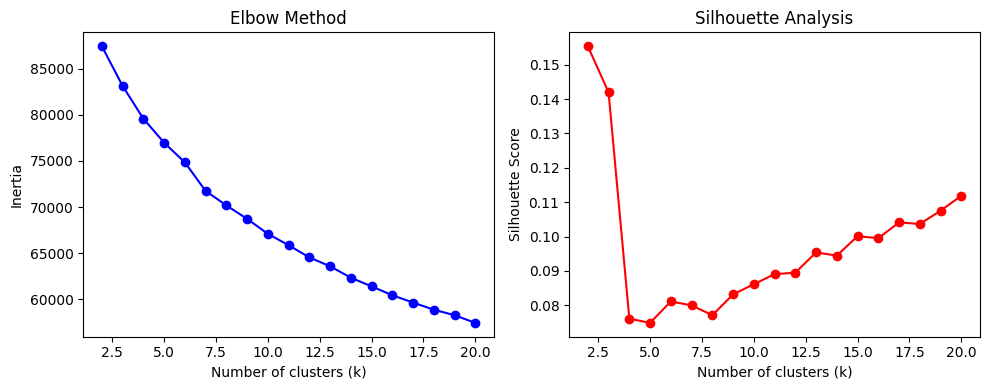

Best k by silhouette: 2, max silhouette score: 0.1554
Best k by Silhouette: 2, max silhouette score: 0.1554


In [68]:
sample_size = 10000
indices = np.random.choice(np.arange(X.shape[0]), size=sample_size, replace=False)
X_sample = X.iloc[indices]
best_k, inertia, silhouette = find_optimal_clusters(X_sample, min_k=2, max_k=20, plot=True)
print(f"Best k by Silhouette: {best_k}, max silhouette score: {max(silhouette):.4f}")

In [69]:
n_clusters = best_k
results = {}      # map: method_name → labels
scores = {}       # map: method_name → silhouette_score

In [70]:
# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=3)
labels_kmeans = kmeans.fit_predict(X)
results['KMeans'] = labels_kmeans

labels_kmeans_sample = kmeans.predict(X_sample)
scores['KMeans'] = silhouette_score(X_sample, labels_kmeans_sample)
print(f'KMeans silhouette: {scores["KMeans"]:.4f}')

KMeans silhouette: 0.1546


In [71]:
# Gaussian Mixture
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels_gmm = gmm.fit_predict(X)
results['GMM'] = labels_gmm

labels_gmm_sample = gmm.predict(X_sample)
scores['GMM'] = silhouette_score(X_sample, labels_gmm_sample)
print(f'GaussianMixture silhouette: {scores["GMM"]:.4f}')

GaussianMixture silhouette: 0.0061


In [ ]:
# Agglomerative Clustering
# agglo = AgglomerativeClustering(n_clusters=n_clusters)
# labels_agglo = agglo.fit_predict(X)
# results['Agglomerative'] = labels_agglo
# scores['Agglomerative'] = silhouette_score(X, labels_agglo)
# print(f'Agglomerative silhouette: {scores["Agglomerative"]:.4f}')

In [ ]:
# DBSCAN
# dbscan = DBSCAN(eps=3, min_samples=10)
# labels_dbscan = dbscan.fit_predict(X)
# results['DBSCAN'] = labels_dbscan
# core_mask = labels_dbscan != -1
# if np.sum(core_mask) > 1:
#     scores['DBSCAN'] = silhouette_score(X[core_mask], labels_dbscan[core_mask])
#     print(f'DBSCAN silhouette (core): {scores["DBSCAN"]:.4f}')
# else:
#     scores['DBSCAN'] = float('-inf')
# print('DBSCAN clusters:', len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0),
#       "Noise points:", np.sum(labels_dbscan == -1))

In [ ]:
# Spectral Clustering
# spectral = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', random_state=42)
# labels_spectral = spectral.fit_predict(X)
# results['Spectral'] = labels_spectral
# scores['Spectral'] = silhouette_score(X, labels_spectral)
# print(f'Spectral silhouette: {scores["Spectral"]:.4f}')

In [72]:
best_method = max(scores, key=scores.get)
best_score = scores[best_method]
labels_best = results[best_method]

print(f"\nBest clustering by silhouette: {best_method} (score {best_score:.4f})")


Best clustering by silhouette: KMeans (score 0.1546)


In [73]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_sample)
umapper = umap.UMAP(n_components=3, random_state=42)
X_umap = umapper.fit_transform(X_sample)
methods_list = list(results.keys())

D:\PyCharm\SmartCode\ML\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [75]:
visualization_labels = {}
visualization_labels['KMeans'] = labels_kmeans_sample
visualization_labels['GMM'] = labels_gmm_sample

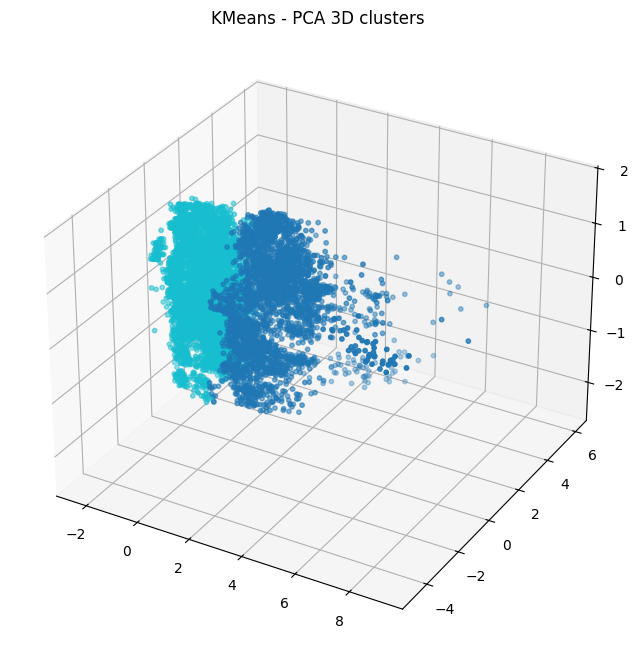

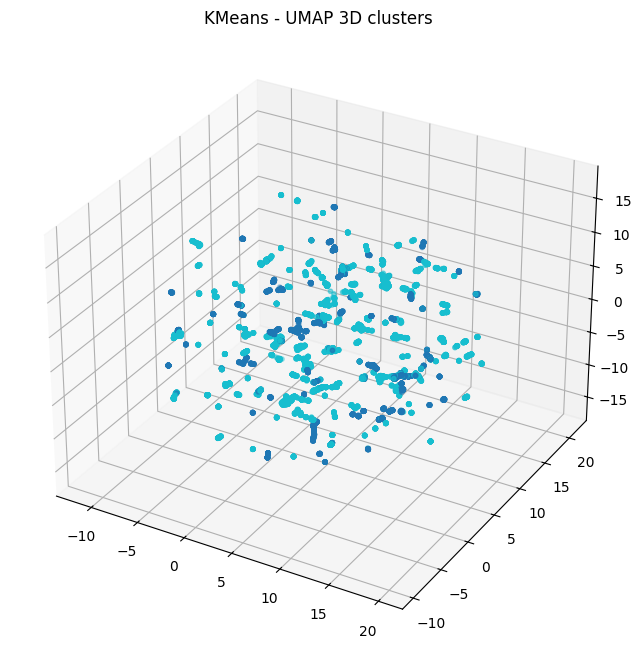

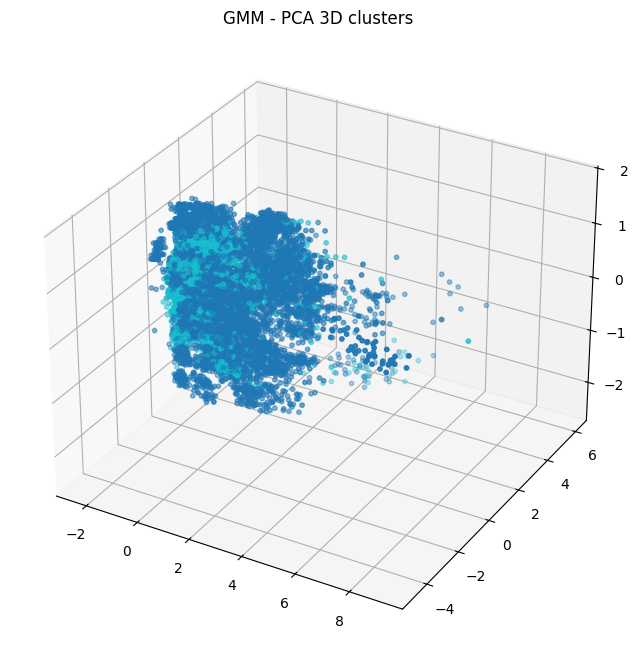

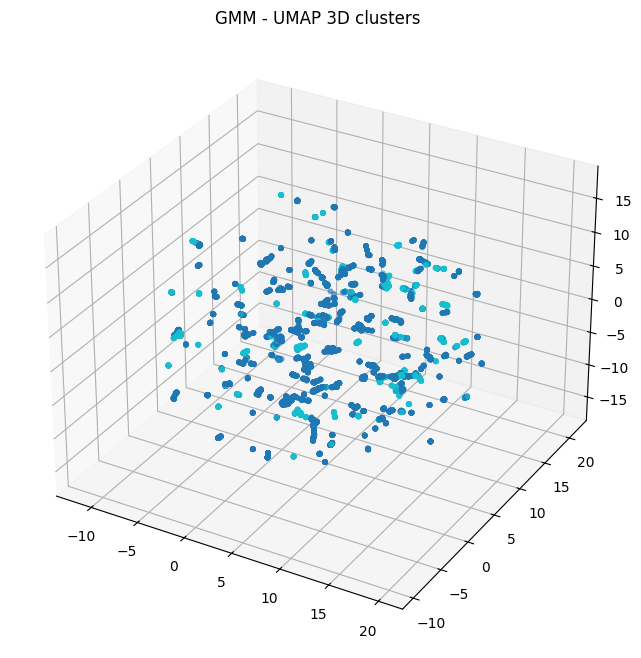

In [76]:
for method in methods_list:
    labels = visualization_labels[method]
    # PCA plot
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=10)
    ax.set_title(f'{method} - PCA 3D clusters')
    plt.show()
    # UMAP plot
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=labels, cmap='tab10', s=10)
    ax.set_title(f'{method} - UMAP 3D clusters')
    plt.show()

In [77]:
def impute_by_cluster_mode(
    df: pd.DataFrame,
    cluster_labels: np.ndarray,
    ohe_base_cols: List[str],
    numeric_cols: List[str] = None
) -> pd.DataFrame:
    """
    Imputes missing values in OHE-format categorical features and numeric features
    by cluster-wise mode (OHE group) or median, respectively.
    Arguments:
        df: DataFrame (prepared/preprocessed, after OHE)
        cluster_labels: np.ndarray of shape (len(df),), cluster number for each row
        ohe_base_cols: list of base names for group OHE columns, e.g. ['cap-shape', ...]
        numeric_cols: list of numerics (or None --> treated as none)
    Returns:
        df_imputed: DataFrame with all *_nan OHE replaced and numerics imputed
    """
    df = df.copy()
    if numeric_cols is None:
        numeric_cols = []
    df["__cluster"] = cluster_labels

    for base in ohe_base_cols:
        related_cols = [c for c in df.columns if c.startswith(base + "_")]
        nan_col = base + "_nan"
        valid_ohe_cols = [c for c in related_cols if c != nan_col]

        for clust in np.unique(cluster_labels):
            in_clust = df["__cluster"] == clust
            mode_col = None
            col_sums = df.loc[in_clust, valid_ohe_cols].sum()
            if (col_sums > 0).any():
                mode_col = col_sums.idxmax()
            else:
                col_sums_global = df[valid_ohe_cols].sum()
                mode_col = col_sums_global.idxmax()
            mask = in_clust & (df[nan_col] == 1)
            if mask.any():
                df.loc[mask, valid_ohe_cols] = 0
                df.loc[mask, mode_col] = 1
                df.loc[mask, nan_col] = 0

        if nan_col in df.columns and df[nan_col].sum() > 0:
            col_sums = df[valid_ohe_cols].sum()
            mode_col = col_sums.idxmax()
            msk = (df[nan_col] == 1)
            df.loc[msk, valid_ohe_cols] = 0
            df.loc[msk, mode_col] = 1
            df.loc[msk, nan_col] = 0

        if nan_col in df.columns:
            df = df.drop(columns=[nan_col])

    for col in numeric_cols:
        for clust in np.unique(cluster_labels):
            in_clust = df["__cluster"] == clust
            med = df.loc[in_clust, col].median(skipna=True)
            if pd.isna(med):
                med = df[col].median(skipna=True)
            mask = in_clust & (df[col].isna())
            df.loc[mask, col] = med

    df = df.drop(columns=["__cluster"])
    
    return df

In [109]:
ohe_base_cols = preprocess_info['ohe_cols']
numeric_cols = preprocess_info['numeric_cols']

mushrooms_imputed = impute_by_cluster_mode(
    mushrooms_preprocessed,
    cluster_labels=labels_best,
    ohe_base_cols=ohe_base_cols,
    numeric_cols=numeric_cols
)

In [110]:
mushrooms_imputed

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_p,...,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,0,0.524458,0,-0.686489,0.536097,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1,-0.384027,0,-0.583009,-0.569236,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,0.130569,0,0.178313,-0.141245,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,-0.517440,0,-0.815840,-0.563033,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,-0.100258,0,-1.107803,-0.336012,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928776,1,0.630341,0,-1.089325,1.775409,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2928777,0,0.964935,1,0.104398,1.972657,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2928778,1,0.316925,0,1.161379,-0.001062,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2928779,0,0.662107,1,1.020941,0.831349,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [141]:
def clear_test(
    data: pd.DataFrame,
    clear_info: Dict[str, Any],
) -> Tuple[pd.DataFrame, Dict[str, Any]]:

    df = data.copy()
    info: Dict[str, Any] = {}

    id_col = clear_info.get('id_col', 'id')
    if id_col in df.columns:
        info['ids'] = df[id_col].copy()
        df.drop(id_col, axis=1, inplace=True)
    info['id_col'] = id_col

    drop_cols = clear_info.get('dropped_cols_nan_above_threshold', [])
    if drop_cols:
        df = df.drop(columns=[col for col in drop_cols if col in df.columns])
    info['dropped_cols_nan_above_threshold'] = drop_cols

    return df, info

In [142]:
mushrooms_test_clean, clear_test_info = clear_test(mushrooms_test, clear_info)

In [143]:
mushrooms_test_clean

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,w,t,g,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,n,f,f,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,n,f,f,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u
4,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u
2077960,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a
2077961,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a
2077962,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a


In [144]:
def preprocess_test(
    data: pd.DataFrame,
    preprocess_info: Dict[str, Any]
) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    
    df = data.copy()
    info = {}

    if 'class' in df.columns:
        df['class'] = (df['class'] == 'p').astype('int8')
    if 'does-bruise-or-bleed' in df.columns:
        df['does-bruise-or-bleed'] = (df['does-bruise-or-bleed'] == 't').astype('int8')
    if 'has-ring' in df.columns:
        df['has-ring'] = (df['has-ring'] == 't').astype('int8')
    info['class_values'] = preprocess_info.get('class_values', None)
    info['does-bruise-or-bleed_values'] = preprocess_info.get('does-bruise-or-bleed_values', None)
    info['has-ring_values'] = preprocess_info.get('has-ring_values', None)

    num_cols = preprocess_info['numeric_cols']
    scaler = preprocess_info['scaler']
    df[num_cols] = scaler.transform(df[num_cols])
    for col in num_cols:
        df[col] = df[col].astype('float32')
    info['numeric_cols'] = num_cols

    majority_classes = preprocess_info['majority_classes']
    for col in majority_classes:
        if col in df.columns:
            df.loc[~df[col].isin(majority_classes[col]), col] = np.nan
    info['minority_to_nan_cols'] = list(majority_classes.keys())

    ohe_cols = preprocess_info['ohe_cols']
    df = pd.get_dummies(df, columns=ohe_cols, dummy_na=True, dtype='int8')
    if 'season' in df.columns:
        df = pd.get_dummies(df, columns=['season'], dummy_na=False, dtype='int8')

    final_columns = preprocess_info['final_columns']
    for col in final_columns:
        if col not in df.columns:
            df[col] = 0
            
    df = df[final_columns]

    final_columns_all = preprocess_info['final_columns']
    final_columns = [col for col in final_columns_all if col != 'class']
    for col in final_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[final_columns]
    info['dtype_map'] = {col: str(df[col].dtype) for col in df.columns}

    return df, info

In [145]:
mushrooms_test_preprocessed, preprocess_test_info = preprocess_test(mushrooms_test_clean, preprocess_info)

In [146]:
mushrooms_test_preprocessed

,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_p,cap-shape_s,...,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_nan,season_a,season_s,season_u,season_w
0,0.490575,1,1.760089,0.750713,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.122099,0,-1.883908,-0.039519,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,-0.915564,0,-0.069301,-0.983580,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,-0.604265,0,-0.512790,-0.317403,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-0.032492,0,0.133964,0.326444,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.152744,0,-1.366505,-1.205639,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2077960,-0.678384,0,-1.359114,-0.457586,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2077961,-0.125670,0,-0.076693,-0.164815,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2077962,-0.273907,0,-0.135824,-0.943882,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [147]:
X_test = mushrooms_test_preprocessed.copy()

In [148]:
X_test = X_test.astype(float)
X_test = X_test.fillna(0)

In [149]:
if best_method == 'KMeans':
    labels_test = kmeans.predict(X_test)
elif best_method == 'GMM':
    labels_test = gmm.predict(X_test)
else:
    knn_cluster = KNeighborsClassifier(n_neighbors=5)
    knn_cluster.fit(X_train, labels_best)
    labels_test = knn_cluster.predict(X_test)

In [150]:
x_test = impute_by_cluster_mode(
    mushrooms_test_preprocessed,
    cluster_labels=labels_test,
    ohe_base_cols=ohe_base_cols,
    numeric_cols=numeric_cols
)

In [151]:
x_test

,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_p,cap-shape_s,...,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,0.490575,1,1.760089,0.750713,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.122099,0,-1.883908,-0.039519,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,-0.915564,0,-0.069301,-0.983580,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,-0.604265,0,-0.512790,-0.317403,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,-0.032492,0,0.133964,0.326444,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,-1.152744,0,-1.366505,-1.205639,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2077960,-0.678384,0,-1.359114,-0.457586,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2077961,-0.125670,0,-0.076693,-0.164815,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2077962,-0.273907,0,-0.135824,-0.943882,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [122]:
y = mushrooms_imputed['class']
x = mushrooms_imputed.drop('class', axis=1)

In [123]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=0)

In [124]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((2196585, 69), (732196, 69), (2196585,), (732196,))

In [125]:
def show_classification_report(y_true, y_pred):
    print("        [ CLASSIFICATION REPORT ]")
    print(classification_report(y_true, y_pred))
    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.4f}")

In [126]:
def classification_plots(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    plt.title('ROC-AUC Curve')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [127]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [128]:
xgb_pred_train = xgb_model.predict(x_train)
xgb_pred_train

array([1, 1, 1, ..., 1, 1, 1], shape=(2196585,))

In [129]:
show_classification_report(y_train, xgb_pred_train)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1016945
           1       0.99      0.99      0.99   1179640

    accuracy                           0.99   2196585
   macro avg       0.99      0.99      0.99   2196585
weighted avg       0.99      0.99      0.99   2196585

Overall Accuracy: 0.9890


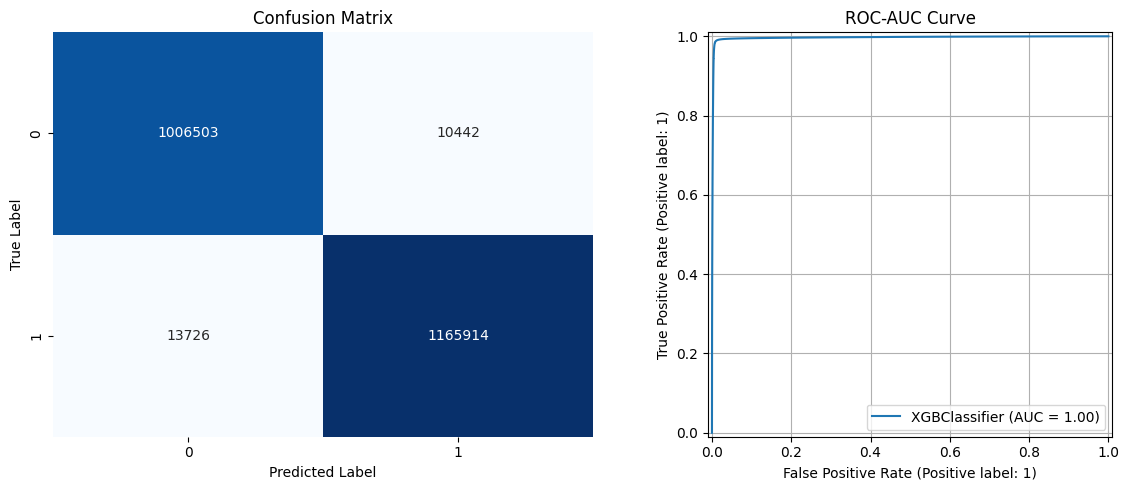

In [130]:
classification_plots(xgb_model, x_train, y_train)

In [131]:
xgb_pred_valid = xgb_model.predict(x_valid)
xgb_pred_valid

array([1, 0, 1, ..., 0, 0, 1], shape=(732196,))

In [132]:
show_classification_report(y_valid, xgb_pred_valid)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    339202
           1       0.99      0.99      0.99    392994

    accuracy                           0.99    732196
   macro avg       0.99      0.99      0.99    732196
weighted avg       0.99      0.99      0.99    732196

Overall Accuracy: 0.9885


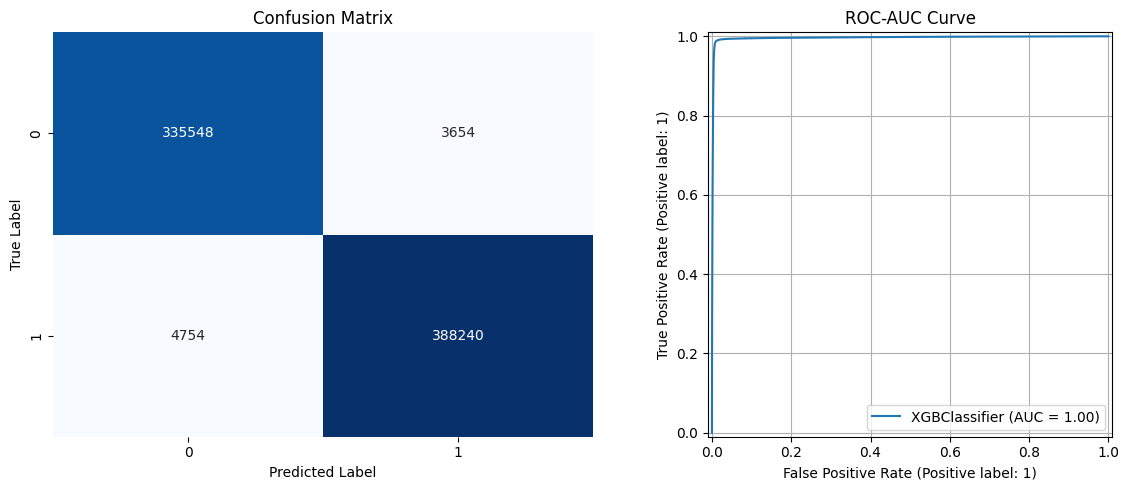

In [133]:
classification_plots(xgb_model, x_valid, y_valid)

In [152]:
xgb_pred = xgb_model.predict(x_test)
xgb_pred

array([0, 1, 1, ..., 1, 0, 0], shape=(2077964,))

In [153]:
ids = clear_test_info['ids']
pred_letters = pd.Series(xgb_pred).map({0: 'e', 1: 'p'}).values
df_sub = pd.DataFrame({
    'id': ids,
    'class': pred_letters
})

In [156]:
df_sub

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [158]:
df_sub.to_csv('poisonous_mushrooms_sample_submission_1.csv', index=False)